In [4]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

In [5]:
# Load the cleaned datasets
ratings_df = pd.read_csv("cleaned_ratings.csv")
reviews_df = pd.read_csv("cleaned_reviews.csv")

In [6]:
# Define the keywords to search for beverages and snacks
beverage_keywords = ['coffee', 'latte', 'tea', 'espresso', 'mocha', 'cappuccino']
snack_keywords = ['pastry', 'sandwich', 'cookie', 'cake', 'muffin', 'croissant']

In [7]:
# Helper function to search for keywords in review text
def find_keywords(text, keywords):
    found = [word for word in keywords if word in text.lower()]
    return found if found else None

In [8]:
# Extract relevant keywords from reviews
reviews_df['beverages'] = reviews_df['full_review_text'].apply(lambda x: find_keywords(x, beverage_keywords))
reviews_df['snacks'] = reviews_df['full_review_text'].apply(lambda x: find_keywords(x, snack_keywords))

In [9]:
# Explode the lists of beverages and snacks to create one row per product mention
beverages_df = reviews_df.explode('beverages').dropna(subset=['beverages'])
snacks_df = reviews_df.explode('snacks').dropna(subset=['snacks'])

In [10]:
# Calculate the frequency of each product
beverage_counts = beverages_df['beverages'].value_counts()
snack_counts = snacks_df['snacks'].value_counts()

In [11]:
# Calculate the average star rating per product
avg_beverage_ratings = beverages_df.groupby('beverages')['star_rating_clean'].mean()
avg_snack_ratings = snacks_df.groupby('snacks')['star_rating_clean'].mean()

In [12]:
# Display the results
print("Beverage Counts:\n", beverage_counts)
print("\nSnack Counts:\n", snack_counts)
print("\nAverage Beverage Ratings:\n", avg_beverage_ratings)
print("\nAverage Snack Ratings:\n", avg_snack_ratings)

Beverage Counts:
 beverages
coffee        4570
latte         1182
tea            972
espresso       618
mocha          336
cappuccino     229
Name: count, dtype: int64

Snack Counts:
 snacks
sandwich     497
cake         366
cookie       263
muffin       149
pastry       129
croissant    126
Name: count, dtype: int64

Average Beverage Ratings:
 beverages
cappuccino    4.087336
coffee        4.189278
espresso      4.166667
latte         4.234349
mocha         4.151786
tea           4.106996
Name: star_rating_clean, dtype: float64

Average Snack Ratings:
 snacks
cake         4.243169
cookie       4.239544
croissant    4.007937
muffin       4.100671
pastry       4.139535
sandwich     4.191147
Name: star_rating_clean, dtype: float64


In [13]:
# Plotting the frequency of mentions
def plot_counts(counts, title):
    counts.plot(kind='bar', figsize=(10, 6))
    plt.title(f"Frequency of {title}")
    plt.xlabel(f"{title}")
    plt.ylabel("Mentions")
    plt.show()

In [14]:
# Plotting the average star ratings
def plot_ratings(avg_ratings, title):
    avg_ratings.plot(kind='bar', figsize=(10, 6))
    plt.title(f"Average Star Ratings of {title}")
    plt.xlabel(f"{title}")
    plt.ylabel("Average Rating")
    plt.ylim(0, 5)
    plt.show()

In [15]:
import sys
!{sys.executable} -m pip install wordcloud

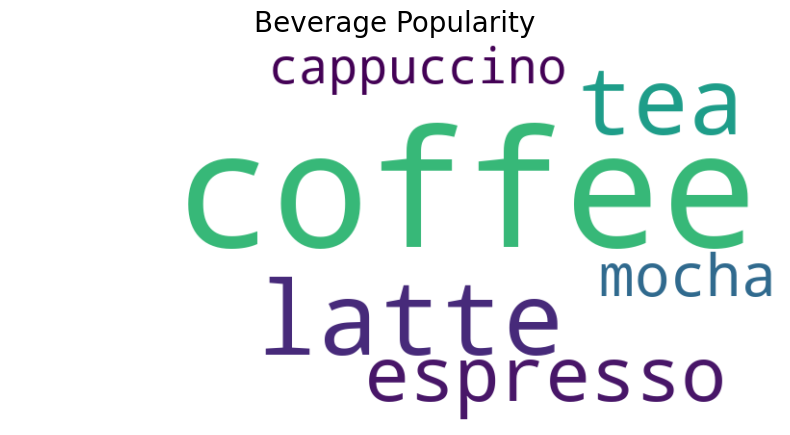

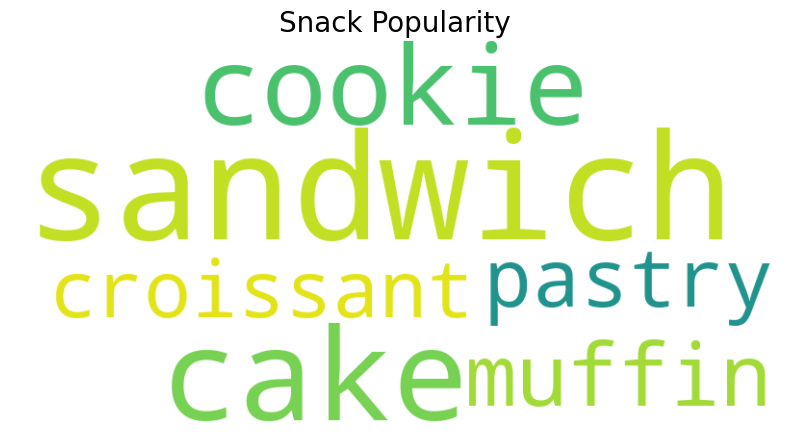

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for beverages and snacks
def generate_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

# Create word clouds from the value counts
generate_wordcloud(beverage_counts, "Beverage Popularity")
generate_wordcloud(snack_counts, "Snack Popularity")

In [24]:
import sys
!{sys.executable} -m pip install squarify

  Using cached squarify-0.4.4-py3-none-any.whl.metadata (600 bytes)
Using cached squarify-0.4.4-py3-none-any.whl (4.1 kB)


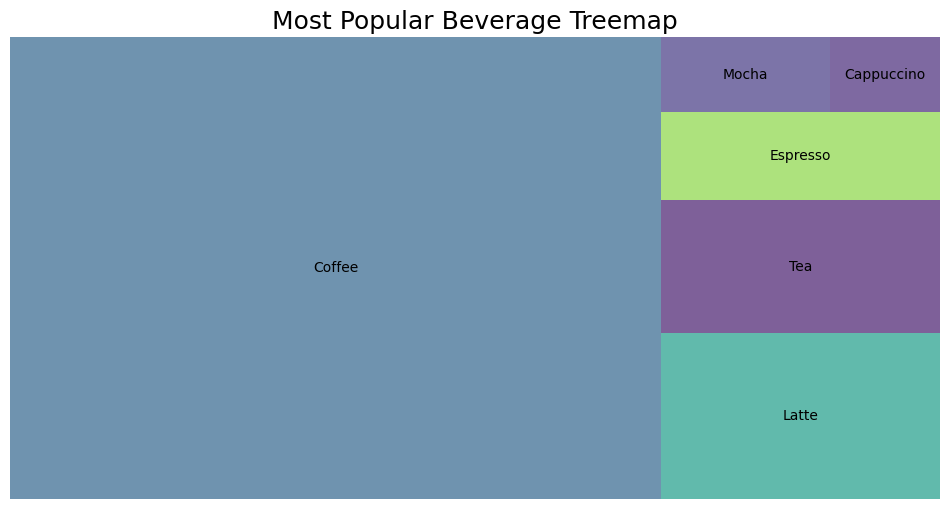

In [27]:
import squarify
import matplotlib.pyplot as plt

# Example data
data = {'Coffee': 9698, 'Latte': 1493, 'Tea': 1193, 'Espresso': 792, 
        'Mocha': 405, 'Cappuccino': 264}

# Create a treemap chart
def treemap_chart(data, title):
    fig, ax = plt.subplots(figsize=(12, 6))
    squarify.plot(sizes=data.values(), label=data.keys(), alpha=0.7, ax=ax)
    ax.set_title(f"{title} Treemap", fontsize=18)
    ax.axis('off')
    plt.show()

# Generate the treemap
treemap_chart(data, "Most Popular Beverage")


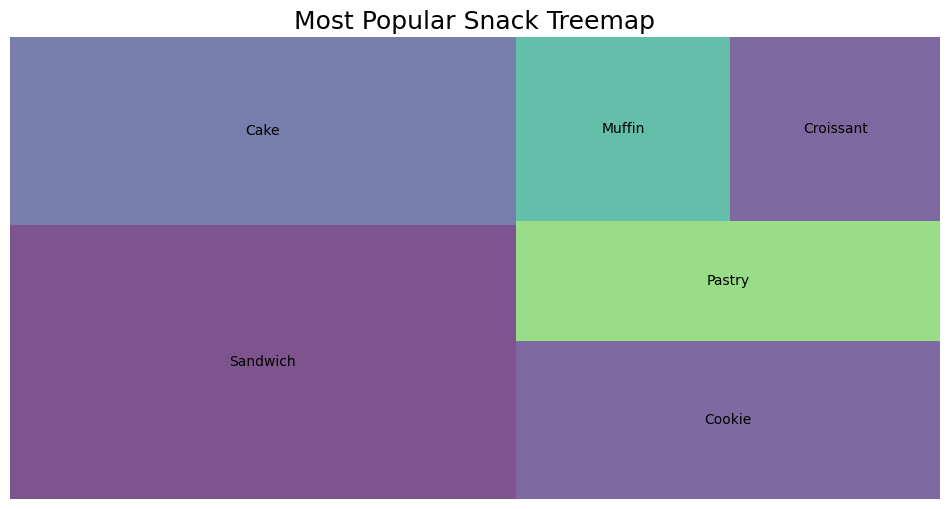

In [28]:
import squarify
import matplotlib.pyplot as plt

# Example snack data from your analysis (you can replace with your actual data)
snack_counts = {'Sandwich': 428, 'Cake': 293, 'Cookie': 207, 
                'Pastry': 157, 'Muffin': 122, 'Croissant': 119}

# Function to create a treemap for snacks
def treemap_chart(data, title):
    fig, ax = plt.subplots(figsize=(12, 6))
    squarify.plot(sizes=data.values(), label=data.keys(), alpha=0.7, ax=ax)
    ax.set_title(f"{title} Treemap", fontsize=18)
    ax.axis('off')
    plt.show()

# Generate the treemap for snack mentions
treemap_chart(snack_counts, "Most Popular Snack")